# Multi-Class Prediction of Cirrhosis Outcomes
Playground Series - Season 3, Episode 26<br>
<https://www.kaggle.com/competitions/playground-series-s3e26/overview><br>
<https://www.kaggle.com/datasets/joebeachcapital/cirrhosis-patient-survival-prediction>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('dataset/train.csv')
df = df.drop('id', axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         7905 non-null   int64  
 1   Drug           7905 non-null   object 
 2   Age            7905 non-null   int64  
 3   Sex            7905 non-null   object 
 4   Ascites        7905 non-null   object 
 5   Hepatomegaly   7905 non-null   object 
 6   Spiders        7905 non-null   object 
 7   Edema          7905 non-null   object 
 8   Bilirubin      7905 non-null   float64
 9   Cholesterol    7905 non-null   float64
 10  Albumin        7905 non-null   float64
 11  Copper         7905 non-null   float64
 12  Alk_Phos       7905 non-null   float64
 13  SGOT           7905 non-null   float64
 14  Tryglicerides  7905 non-null   float64
 15  Platelets      7905 non-null   float64
 16  Prothrombin    7905 non-null   float64
 17  Stage          7905 non-null   float64
 18  Status  

In [21]:
categorical_variables = df.drop('Status', axis=1).select_dtypes(include='O').columns.to_list()
categorical_variables

['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

In [22]:
numerical_variables = df.drop('Status', axis=1).select_dtypes(include=['int64', 'float64']).columns.to_list()
numerical_variables

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

In [23]:
y = df['Status']

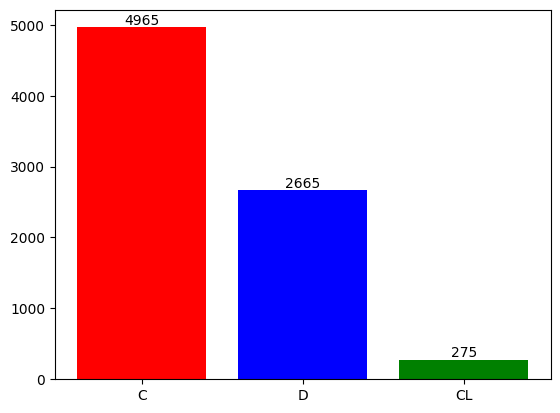

In [48]:
def y_plot(y):
    value_counts = y.value_counts()
    labels = value_counts.index.tolist()
    values = value_counts.values.tolist()
    fig, ax = plt.subplots()
    bars = ax.bar(labels, values, color=['red', 'blue', 'green'])
    ax.bar_label(bars)

y_plot(y)

Classes aren't well balanced in the dataset.

#### Analysis of categorical variables

In [82]:
def df_cat_analysis(df, var):
    print('Value counts in percentage (%):')
    print(df[var].value_counts()/len(df)*100) # in percentage)
    print('')
    print('Crosstab:')
    print(pd.crosstab(df[var], df['Status'], normalize='index')*100)



##### Drug

In [83]:
df_cat_analysis(df, 'Drug')

Value counts in percentage (%):
Drug
Placebo            50.727388
D-penicillamine    49.272612
Name: count, dtype: float64

Crosstab:
Status                   C        CL          D
Drug                                           
D-penicillamine  61.745828  3.876765  34.377407
Placebo          63.840399  3.092269  33.067332


The drug type do not seem to affect the outcome.

##### Sex

In [84]:
df_cat_analysis(df, 'Sex')

Value counts in percentage (%):
Sex
F    92.802024
M     7.197976
Name: count, dtype: float64

Crosstab:
Status          C        CL          D
Sex                                   
F       64.544711  3.421483  32.033806
M       40.421793  4.217926  55.360281


Do men die more?

##### Ascites

In [85]:
df_cat_analysis(df, 'Ascites')

Value counts in percentage (%):
Ascites
N    95.192916
Y     4.807084
Name: count, dtype: float64

Crosstab:
Status           C        CL          D
Ascites                                
N        65.647841  3.574751  30.777409
Y         6.578947  1.578947  91.842105


Ascites looks like a great predictor. Its presence equals almost certain death (91% of the cases).

##### Hepatomegaly

In [86]:
df_cat_analysis(df, 'Hepatomegaly')

Value counts in percentage (%):
Hepatomegaly
Y    51.132195
N    48.867805
Name: count, dtype: float64

Crosstab:
Status                C        CL          D
Hepatomegaly                                
N             82.164121  2.821641  15.014238
Y             44.309748  4.106878  51.583375


Having Hepatomegaly increases chances of death.

##### Spiders

In [87]:
df_cat_analysis(df, 'Spiders')

Value counts in percentage (%):
Spiders
N    75.471221
Y    24.528779
Name: count, dtype: float64

Crosstab:
Status           C        CL          D
Spiders                                
N        71.605766  3.234998  25.159236
Y        35.740072  4.228984  60.030944


Having spiders increases chances of death.

##### Edema

In [88]:
df_cat_analysis(df, 'Edema')

Value counts in percentage (%):
Edema
N    90.588235
S     5.047438
Y     4.364326
Name: count, dtype: float64

Crosstab:
Status          C        CL          D
Edema                                 
N       67.686077  3.588884  28.725038
S       27.568922  4.010025  68.421053
Y        2.318841  0.579710  97.101449


Having Edema despite diuretic therapy is certain death.